# 🍓 군집 Clustering
## 🍋 1. 군집 모델  

군집 모델에는 분할 기반의 군집과 계층적 군집 모델이 존재  
* 분할 기반 군집 모델 : k-means, k-medoids, DBSCAN ...
* 계층적 군집 모델 : 병합적 군집, 분할적 군집


<br/>


---


## 🍋 2. 분할 기반 군집 모델
### 2.1 k-means 클러스터링

>  주어진 데이터를 __k개의 클러스터__ 로 묶는 알고리즘  
레이블이 없는 입력 데이터에 레이블을 달아주는 역할을 수행

분류할 클러스터의 수(k)가 정해지면 각 클러스터마다 초기중심을 정함  

__*중심 ?*__ 
: 클러스터를 대표하는 가상의 레이블이며 각 학습 데이터가 자신이 속한 클러스터를 결정하는 기준점 !  


* k-means의 목표
    * = 최적의 중심을 구하는 것
    * = 각 집합별 중심점~집합 내 오브젝트간 거리의 제곱합을 최소로 하는 집합 S를 찾는 것
    
    

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris() # 붓꽃 데이터 불러오기
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

In [3]:
feature = data[ ['Sepal length','Sepal width']]
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [5]:
r = pd.concat([feature,predict],axis=1)

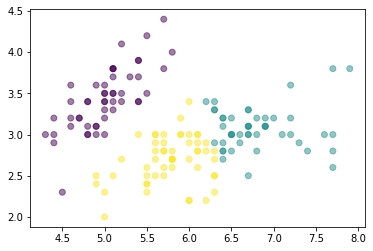

In [6]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)

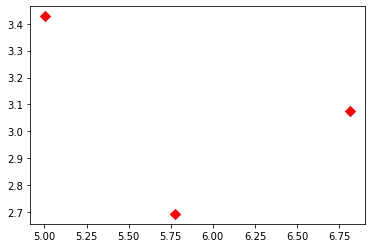

In [7]:
# 중심 찾기
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

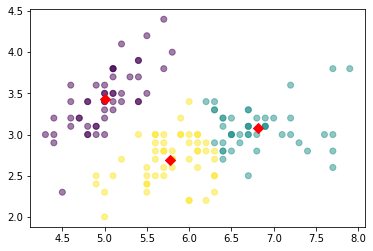

In [8]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')



---

<br/>

### 2.2 DBSCAN 클러스터링(density-based spatial clustering of applications with noise)
> 노이즈 및 아웃라이어 데이터 식별에 강한 군집 모델  
__밀도 있게 연결돼 있는__ 데이터 집합은 동일한 클러스터라고 판단함

* DBSCAN(min_sample, eps)은 매개 변수가 2개
    * min_sample
    * eps


<img src="https://raw.githubusercontent.com/lmyourGenie/MachineLearning_Study/master/basic_concept/resource/dbscan.png" width="300" height="300" title="DBSCAN의 3가지 데이터 형태">

k-means 와 달리 데이터의 클러스터 수를 사전에 지정할 필요가 없음  
DBSCAN은 비선형 적으로 분리 가능한 클러스터를 찾을 수 있음

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/330px-DBSCAN-density-data.svg.png" width="300" height="300" title="기하학적인 구조를 클러스터링한 모습">  

* 동작
    1. 랜덤으로 데이터 포인트를 뽑고, 데이터 포인트에서 eps(epsilon)의 거리(기본값은 유클리디안 거리)안에 데이터 포인트를 찾음
    2. 만약 찾은 포인트가 min_sample수보다 적으면 noise로 처리하고, min_sample보다 많으면 새로운 클러스터 레이블 할당
    3. 새로운 클러스터에 할당된 포인트들의 eps 거리 안의 모든 이웃을 찾아서 클러스터 레이블이 할당되지 않았다면 현재의 클러스터에 포함시킴
    4. 더 이상 데이터 포인가 없으면 클러스터 레이블이 할당되지 않은 데이터 포인트들에 대해 1~3 반복  
    
<br/>



In [9]:
#two_moon 데이터 셋
from sklearn.datasets import make_moons
import pandas as pd
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

df = pd.DataFrame(X, columns=["x", "y"])
df["group"] = y
df[:5]

,x,y,group
0,0.715413,-0.494089,1
1,0.246789,-0.240091,1
2,0.943261,0.346800,0
3,0.973742,-0.492901,1
4,1.239713,-0.411411,1


In [10]:
#표준화(평균=0, 분산=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df[["x", "y"]])
scaled_X = scale.transform(df[["x", "y"]])

df["scaled_x"] = scaled_X[:,0]
df["scaled_y"] = scaled_X[:,1]

In [11]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) #기본값이다.
cluster = dbscan.fit_predict(scaled_X)
df["cluster"] = cluster

Text(0, 0.5, 'y')

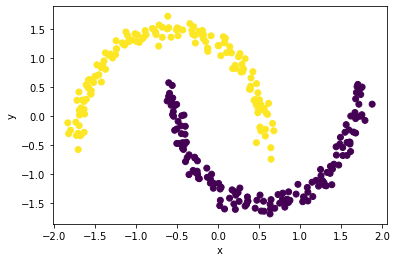

In [12]:
#clustering 결과 확인
plt.scatter(x=df.scaled_x, y=df.scaled_y, c=df.cluster)
plt.xlabel("x")
plt.ylabel("y")


---

<br/>


## 🍋 3. 계층형 군집 모델(Hierarchical Clustering Model)
>유사한 특성을 지닌 데이터를 그리디(greedy)하게 묶어 이진 트리 형태로 만들어 가는 방법  
이진 트리가 완성되면 이를 계통수(dendrogram)이라 함  

k-means 와 달리 데이터의 클러스터 수를 사전에 지정할 필요가 없음  
전체 데이터의 분할 게층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인 가능  

* 종류
    * 병합적 군집(agglomerative clustering) = 상향식 군집  
        > 1. 모든 데이터를 단일 클러스터로 정의함  
        > 2. 각 클러스터 간 유사성 계산  
        > 3. 유사성이 가장 높은 두 개의 클러스터를 합합  
        > 4. 2, 3 단계를 전체 클러스터의 개수가 1이 될 때까지 반복  
          
    * 분할적 군집(divisive clustering) = 하향식 군집  
        > 1. 모든 데이터를 포함하는 단일 클러스터를 생성함
        > 2. 각 클러스터 간 유사성 계산  
        > 3. 유사성이 가장 낮은 두 클리스터를 분리함
        > 4. 2, 3 단계를 전체 클러스터의 개수가 데이터의 개수와 같아질 때까지 반복


Text(0, 0.5, 'cluster distance')

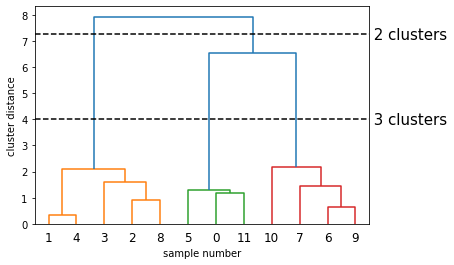

In [13]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그림
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")

---

<br/>

출처정리  

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html  
https://bcho.tistory.com/1203  
https://en.wikipedia.org/wiki/DBSCAN  
http://databaser.net/moniwiki/wiki.php/DBSCAN#s-2  
https://subinium.github.io/MLwithPython-3-5/  
